# Plotting and Visualisation 

Making informative visualisations (or _plots_) is one of the most important tasks in data analysis. It may be a part of the exploratory process - for example, to help identify outliers or needed data transformations, or as a way of generating ideas for models. For others, building an interactive visualisation for the web may be the end goal. Python has many add-on libraries for making static or dynamic visualisations, but I'll focus on briefly using [`matplotlib`](http://matplotlib.sourceforge.net) and libraries that build on top of it.

`matplotlib` is a desktop plotting package designed for creating publication-quality plots. Over time, `matplotlib` has spawned a number of add-on toolkits for data visualisation that use matplotlib for their underlying plotting. One of these is [`seaborn`](http://seaborn.pydata.org), which we will explore later in this note. 

The simplest way to follow the code examples in this note is to use interactive plotting in the Jupyter notebook. To set this up, execute the following statement in a Jupyter notebook:

```python
    %matplotlib notebook
```    

To disable the interactive plots and have the plots shown as mere static displays in Jupyter, run the following command instead (default mode in Jupyter notebook):
```python
    %matplotlib inline
```

_**Note:** Above code statements are IPython's special commands (not built into Python itself), otherwise known as "magic" commands. A magic command is any command prefixed by the percent symbol % and is designed to enable you to easily control the behaviour of the IPython system to facilitate common tasks._

For the purpose of intending this as a reference note, I will leave out the magic command for the interactive plots but you can run it on your own computer to facilitate the learning experience.

## A Brief matplotlib API Primer

After importing matplotlib, we can try creating a simple plot like below:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

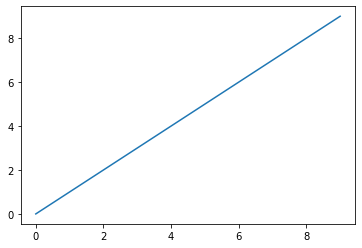

In [2]:
data = np.arange(10)
plt.plot(data)

### Figures and Subplots

Plots in matplotlib reside within a `Figure` object. You can create a new figure with `plt.figure:`

In [3]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In IPython, an empty plot window will appear but in Jupyter, nothing is shown until we run a few more commands. We can't make a plot with a blank figure. We will have to create one or more `subplots` using `add_subplot`:

```python
ax1 = fig.add_subplot(2, 2, 1)
```

This means that the figure should be 2 x 2 (so up to four plots in total), and we're selecting the first of four subplots (numbered from 1). If you create the next two subplots, you'll end up with a visualisation with three subplots:

```python
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
```

_**Note:** One nuance of using Jupyter notebooks is that plots are reset after each cell is evaluated. Thus to illustrate the example, I will have to repeat and put all of the plotting commands in a single notebook cell like below:_

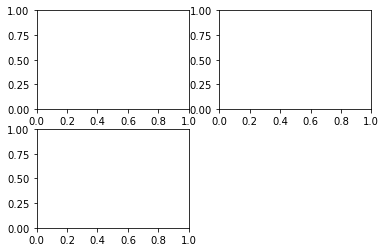

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

When we issue a plotting command like `plt.plot([1.5, 3.5, -2, 1.6])`, matplotlib draws on the last figure and subplot used (creating one if necessary), thus hiding the figure and subplot creation. Let's append the following command to the above codeblock and run to see the result: 

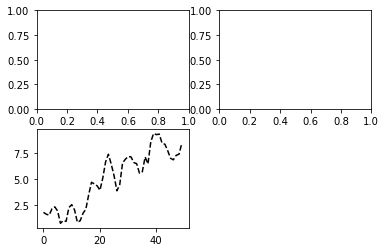

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')  # adds a linegraph to the last subplot

The `'k--'` is a _style_ option instructing matplotlib to plot a black dashed line. The objects returned by `fig.add_subplot` here are `AxesSubplot` objects, on which you can directly plot on the other empty subplots by calling each one's instance method:

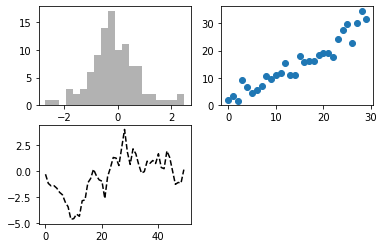

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')   # adds a linegraph to the last subplot
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)  # adds a histogram to the first subplot
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))  # adds a scatterplot to the second subplot

You can find a comprehensive catalog of plot types in the matplotlib documentation [(click  here)](http://matplotlib.sourceforge.net)

Creating a figure with a grid of subplots is a very common task, so matplotlib includes a convenience method, `plt.subplots`, that creates a new figure and returns a NumPy array containing the created subplot objects:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feaf07efc40>,
      dtype=object)

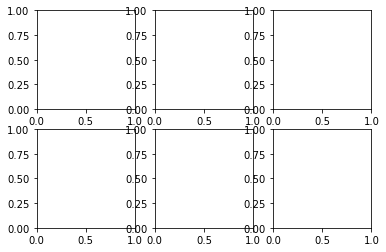

In [7]:
fig, axes = plt.subplots(2, 3)
axes

This is very useful, as the `axes` array can be easily indexed like a two-dimensional array; for example, `axes[0,1]`. You can also indicate that subplots should have the same x- or y-axis using `sharex` and `sharey` respectively. This is especially useful when you're comparing data on the same scale; otherwise, matplotlib autoscales plot limits independently. See table below for more on this method:

**Argument** | **Description** 
--- | ---
`nrows` | Number of rows of subplots
`ncols` | Number of columns of subplots
`sharex` | All subplots should use the same x-axis ticks (adjusting the `xlim` will affect all subplots)
`sharey` | All subplots should use the same y-axis ticks (adjusting the `ylim` will affect all subplots)
`subplot_kw` | Dict of keywords passed to `add_subplot` call used to create each subplot
`**fig_kw` | Additional keywords to `subplots` are used when creating the figure, such as `plt.subplots(2, 2, figsize=(8,6))`

### Adjusting the spacing around subplots

By default, matplotlib leaves a certain amound of padding around the outside of the subplots and spacing between subplots. This spacing is all specified relative to the height and width of the plot, so that if you resize the plot either programmatically or manually using the GUI window, the plot will dynamically adjust itself. You can change the spacing using the `subplots_adjust` method on `Figure` objects, also available as a top-level function:

```python
subplots_adjust(left=None, bottom=None, right=None, top=None,
                 wspace=None, hspace=None)
```

`wspace` and `hspace` controls the percent of the figure width and figure height, respectively, to use as spacing between subplots. Here is a small example where I shrink the spacing all the way to zero 

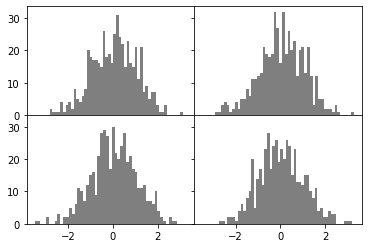

In [8]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
        plt.subplots_adjust(wspace=0, hspace=0)

matplotlib doesn't check whether the labels overlap, so you may notice the axis labels overlap in some cases. In such a case, you would need to fix the labels yourself by specifying explicit tick locations and tick labels (we'll cover this in later sections).

### Colors, Markers, and Line Styles

Matplotlib's main `plot` function accepts arrays of x and y coordinates and optionally a string of abbreviation indicating color and line style. For example, to plot x versus y with green dashes, you would execute:

```python
ax.plot(x, y, 'g--')
```

This way of specifying both color and line style in a string is provided as a convenience; in practice if you were creating plots programmatically, you might prefer not to have to munge strings together to create plots with the desired style. The same plot could also have been expressed more explicitly as:

```python
ax.plot(x, y, linestyle='--', color='g')
```

There are a number of color abbreviations provided for commonly used colors, but you can use any color on the spectrum by specifying its hex code (e.g., `'#CECECE'`). You can see the full set of line styles by looking at the docstring for plot (use `plot?` in IPython or Jupyter).

Line plots can additionally have _markers_ to highlight the actual data points. Since matplotlib creates a continuous line plot, interpolating between points, it can occasionally be unclear where the points lie. The marker can be part of the style string, which must have color followed by market type and line style:

In [9]:
from numpy.random import randn

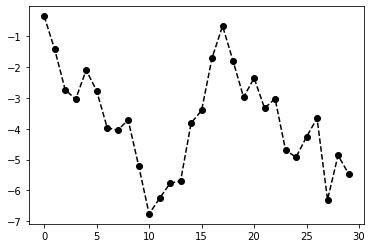

In [10]:
plt.plot(randn(30).cumsum(), 'ko--')

This could also have been written more explicitly as:

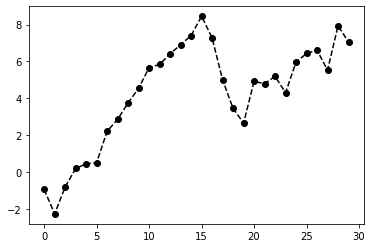

In [11]:
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

For line plots, you will notice that subsequent points are linearly interpolated by default. This can be altered with the `drawstyle` option:

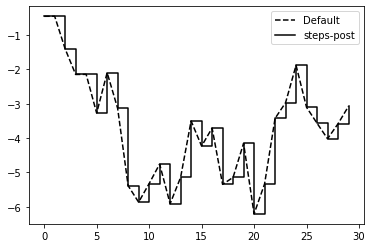

In [12]:
data = np.random.randn(30).cumsum()

plt.plot(data, 'k--', label='Default')  # dash line graph
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')  # solid line graph
plt.legend(loc='best')

You may notice output like `<matplotlib.lines.Line2D at...>` when you run this. matplotlib returns objects that reference the plot subcomponent that was just added. Most of the time, you can safely ignore this output. 

As we passed the `label` arguments to `plot`, we are able to create a plot legend to identify each line using `plt.legend`.

### Ticks, Labels, and Legends

For most kinds of plot decorations, there are two main ways to do things: using the procedural `pyplot` interface (i.e., `matplotlib.pyplot`) and the more object-oriented native matplotlib API.

The `pyplot` interface, designed for interactive use, consists of methods like `xlim`, `xticks`, and `xticklabels`. These control the plot range, tick locations, and tick labels, respectively. They can be used in two ways:

+ Called with no arguments returns the current parameter value (e.g. `plt.xlim()` returns the current x-axis plotting range)
+ Called with parameters sets the parameter value (e.g. `plt.xlim([0, 10])`, sets the x-axis range 0 to 10).

All such methods act on the active or most recently created `AxesSubplot` object. Each of them corresponds to two methods on the subplot object itself; in the case of `xlim` these are `ax.get_xlim` and `ax.set_xlim`.


#### Setting the title, axis labels, ticks, and ticklabels

To illustrate customising the axes, I'll create a simple figure and plot of a random walk:

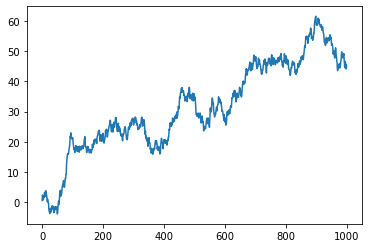

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

To change the x-axis ticks, it's easiest to use `set_xticks` and `set_xticklabels`. The former instructs matplotlib where to place the ticks along the data range; by default these locations will also be the labels. But we can set any other values as the labels using the `set_xticklabels`:

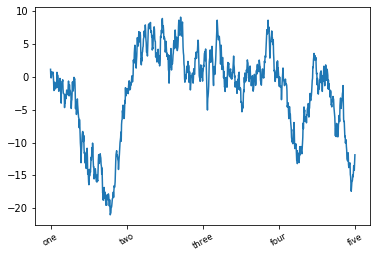

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

## amending the ticks and labels
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

The `rotation` option sets the x tick labels at a 30-degree rotation. Lastly, `set_xlabel` gives a name to the x-axis and `set_title` the subplot title like how it is shown below:

Text(0.5, 0, 'Stages')

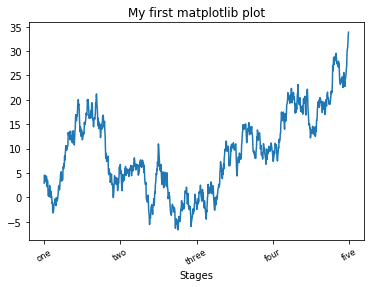

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

## amending the ticks and labels
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

Modifying the y-axis consists of the same process, substituting y for x in the above. The axes class has a `set` method that allows batch setting of plot properties. From the prior example, we could also have written:

[[<matplotlib.axis.XTick at 0x7feaf022e640>,
 [Text(0, 0, 'one'),
  Text(0, 0, 'two'),
  Text(0, 0, 'three'),
  Text(0, 0, 'four'),
  Text(0, 0, 'five')],
 Text(0.5, 0, 'Stages'),
 Text(0.5, 1.0, 'My first matplotlib plot')]

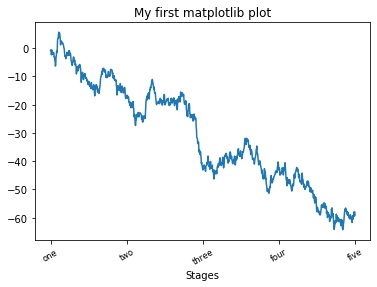

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

# set batch properties for ticklabels
props = {'rotation': 30,
         'fontsize': 'small'}
plt.setp(ax.get_xticklabels(), **props)  # apply above properties to xticklabels


# set batch properties for the plot
props = {
    'xticks': [0, 250, 500, 750, 1000],
    'xticklabels': ['one', 'two', 'three', 'four', 'five'], 
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)

#### Adding legends

Legends are another critical element for identifying plot elements. There are a couple of ways to add one. The easiest is to pass the `label` argument when adding each piece of the plot. Once you've done this, you can either call `ax.legend()` or `plt.legend()` to automatically create a legend. The resulting plot is this:

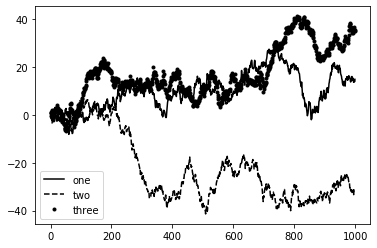

In [17]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

# create a legend in the plot
ax.legend(loc='best')